Значення точок даних у вузлах інтерполяції: {-3, -1, 1, 3, 5}

In [54]:
X = [-3, -1, 1, 3, 5]

In [55]:
import math
import numpy as np 
import matplotlib.pyplot as plt

f = lambda x: math.sin(x) + np.cbrt(2 * x)

In [56]:
y = [f(x) for x in X]
y

[-1.9582406008920066,
 -2.1013920347027693,
 2.1013920347027693,
 1.9582406008920066,
 1.1955104153687452]

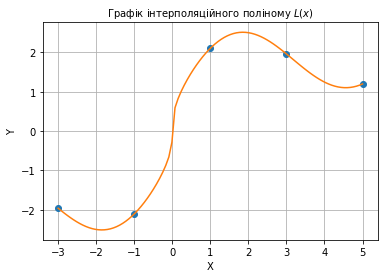

In [65]:
x_new = np.linspace(np.min(X), np.max(X), 100)
y_new = [f(x) for x in x_new]
plt.plot(X, y, 'o', x_new, y_new)
plt.title(r'Графік функції $f(x) = \sin (x) + \sqrt[3]{2 \cdot x}$', fontsize=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

In [58]:
%%latex
Знайдемо інтерполяційний многочлен Лагранжа.
$$\newline$$
Для початку запишемо формулу для інтерполяційного полінома у формі Лагранжа:
    $$
    L(x) = y_0\frac{(x-x_1)(x-x_2)(x-x_3)(x-x_4)}{(x_0-x_1)(x_0-x_2)(x_0-x_3)(x_0-x_4)} + 
            y_1\frac{(x-x_0)(x-x_2)(x-x_3)(x-x_4)}{(x_1-x_0)(x_1-x_2)(x_1-x_3)(x_1-x_4)} + 
            y_2\frac{(x-x_0)(x-x_1)(x-x_3)(x-x_4)}{(x_2-x_0)(x_2-x_1)(x_2-x_3)(x_2-x_4)} +
            y_3\frac{(x-x_0)(x-x_1)(x-x_2)(x-x_4)}{(x_3-x_0)(x_3-x_1)(x_3-x_2)(x_3-x_4)} + 
            y_4\frac{(x-x_0)(x-x_1)(x-x_2)(x-x_3)}{(x_4-x_0)(x_4-x_1)(x_4-x_2)(x_4-x_3)} =            
    $$
Підставимо значення вузлів інтеполяції:
    $$ = -1.95824 \cdot \frac{(x+1)(x-1)(x-3)(x-5)}{(-3+1)(-3-1)(-3-3)(-3-5)} + 
            (-2.10139) \cdot \frac{(x+3)(x-1)(x-3)(x-5)}{(-1+3)(-1-1)(-1-3)(-1-5)} + 
            2.10139 \cdot \frac{(x+3)(x+1)(x-3)(x-5)}{(1+3)(1+1)(1-3)(1-5)} +
            1.95824 \cdot \frac{(x+3)(x+1)(x-1)(x-5)}{(3+3)(3+1)(3-1)(3-5)} + 
            1.19551 \cdot \frac{(x+3)(x+1)(x-1)(x-3)}{(5+3)(5+1)(5-1)(5-3)} =
    $$
Виконаємо перетворення:
    $$ = -1.95824 \cdot \frac{(x+1)(x-1)(x-3)(x-5)}{384} + 
        2.10139 \cdot \frac{(x+3)(x-1)(x-3)(x-5)}{96} +
        2.10139 \cdot \frac{(x+3)(x+1)(x-3)(x-5)}{64} +
        (-1.95824) \cdot \frac{(x+3)(x+1)(x-1)(x-5)}{96} +
        1.19551 \cdot \frac{(x+3)(x+1)(x-1)(x-3)}{384}
    $$
Інтерполяційний многочлен Лагранжа має вигляд:
    $$
        L(x) = 0.03233x^4 - 0.24674x^3 + 0.00495x^2 + 2.87348x - 2.66402
    $$

<IPython.core.display.Latex object>

In [59]:
class LagrangePolynom:

    def __init__(self, X, Y):
        self.n = len(X)
        self.X = np.array(X)
        self.Y = np.array(Y)

    def basis(self, x, j):
        b = [(x - self.X[m]) / (self.X[j] - self.X[m])
             for m in range(self.n) if m != j]
        return np.prod(b, axis=0) * self.Y[j]

    def interpolate(self, x):
        b = [self.basis(x, j) for j in range(self.n)]
        return np.sum(b, axis=0)

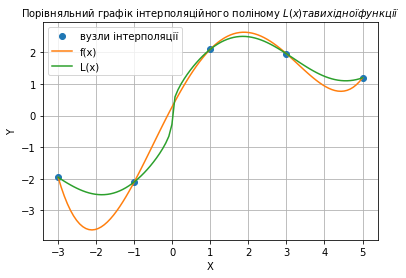

In [72]:
lp = LagrangePolynom(X, y)
xx = np.linspace(np.min(X), np.max(X), 100)
plt.plot(X, y, 'o', xx, lp.interpolate(xx))
plt.plot(x_new, y_new)
plt.legend(['вузли інтерполяції', r'f(x)', r'L(x)'])
plt.title(r'Порівняльний графік інтерполяційного поліному $L(x) та вихідної функції$', fontsize=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()